# Support Vector Machines and Kernels

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [1]:
from __future__ import print_function
import os
#Please set the path below as per your system data folder location
#data_path = ['..', 'data']
data_path = ['data']

## Question 1

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the two most correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [2]:
import pandas as pd
import numpy as np
from ipywidgets import interact

filepath = os.sep.join(data_path + ['Wine_Quality_Data.csv'])
data = pd.read_csv(filepath, sep=',')

In [3]:
data.describe().applymap(lambda x: round(x,3))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000
mean,7.215,0.340,0.319,5.443,0.056,30.525,115.745,0.995,3.219,0.531,10.492,5.818
std,1.296,0.165,0.145,4.758,0.035,17.749,56.522,0.003,0.161,0.149,1.193,0.873
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.290,0.310,3.000,0.047,29.000,118.000,0.995,3.210,0.510,10.300,6.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,156.000,0.997,3.320,0.600,11.300,6.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.900,9.000


In [4]:
y = (data['color'] == 'red').astype(int) # Casting Boolean as integer, 1 = red, 0 = white
fields = list(data.columns[:-1])  # The remaining column names, besides the last column "color"
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

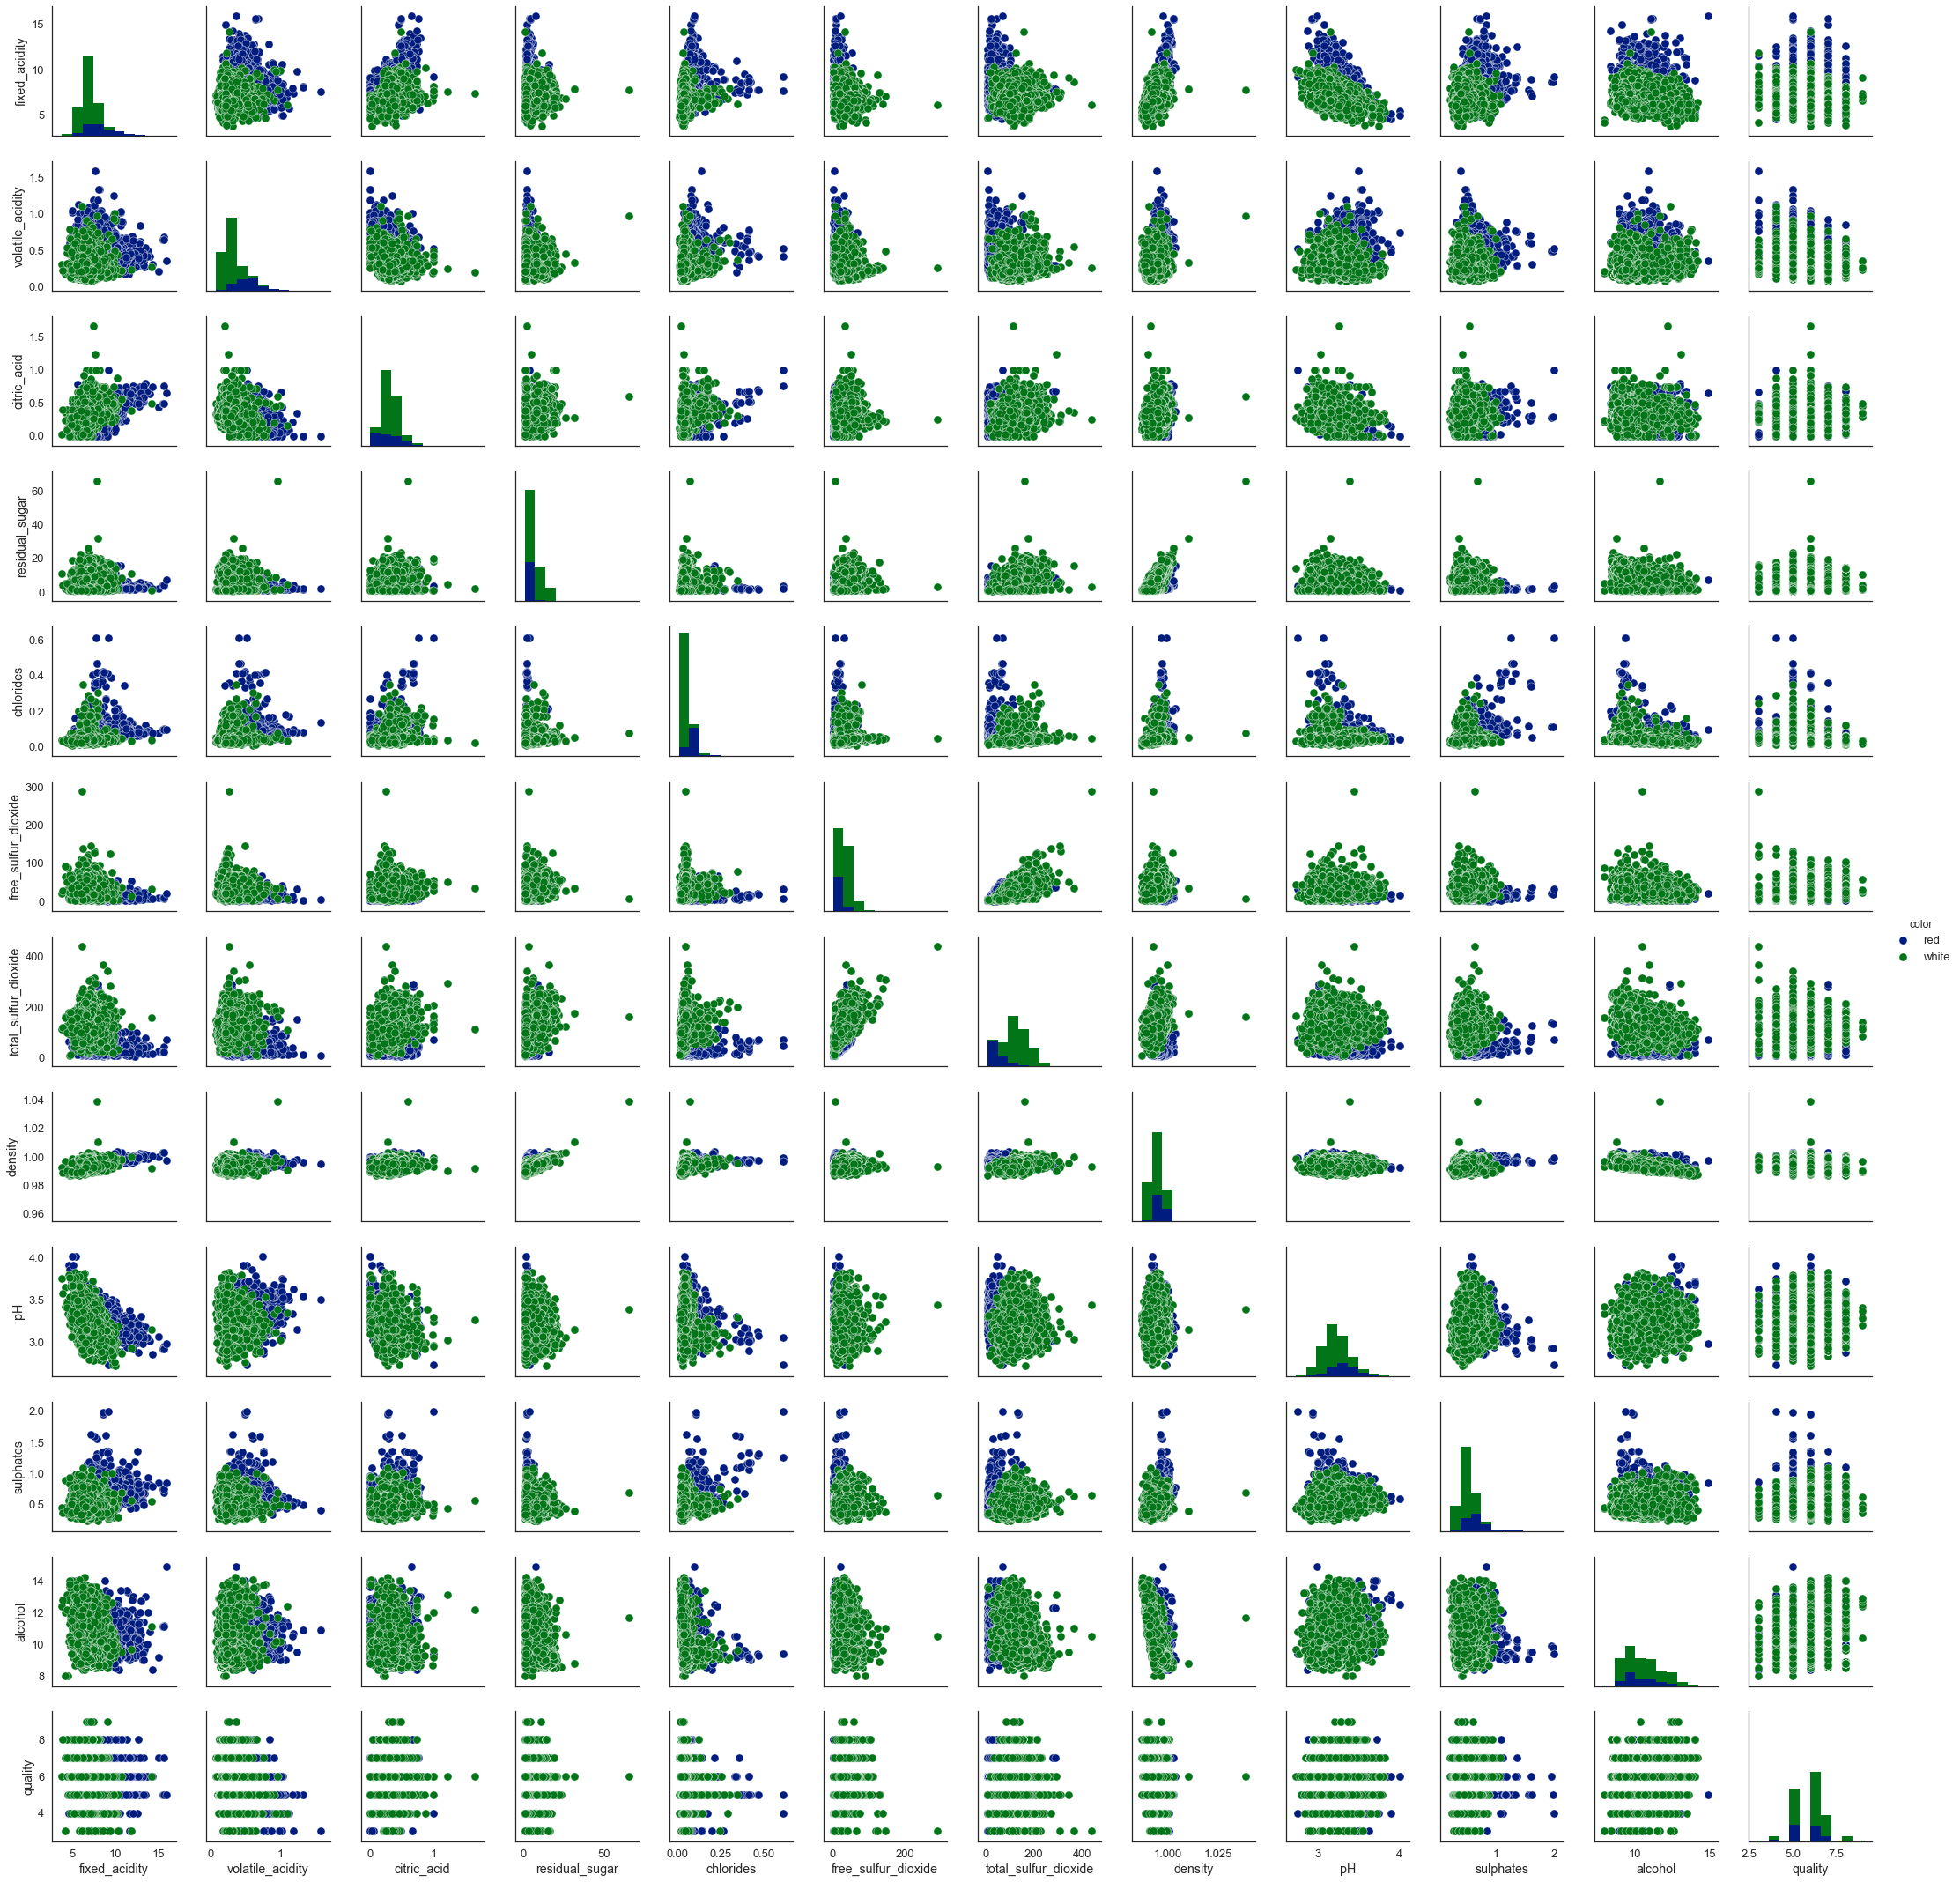

In [6]:
sns.pairplot(data, hue='color')

Create a bar plot showing the correlations between each column and the target variable `y` (color)

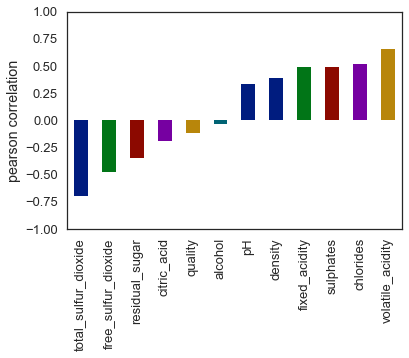

In [7]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Pick the two most correlated fields (using the absolute value of correlations) to create `X`
fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]

# Scaling X with MinMaxScaler will output an np.array
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# We cast X as a Dataframe and rename the columns appropriately
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')
Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')


## Question 2

The goal for this question is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py) in sklearn's documentation. 

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
```

Feel free to experiment with different parameter choices for LinearSVC and see the decision boundary.

The linear models `LinearSVC()` and `SVC(kernel='linear')` yield slightly different decision boundaries. This can be a consequence of the following differences:
- `LinearSVC` minimizes the squared hinge loss while `SVC` minimizes the regular hinge loss.
- `LinearSVC` uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while `SVC` uses the One-vs-One multiclass reduction.

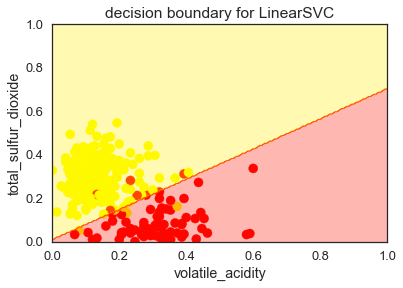

In [9]:
from sklearn.svm import LinearSVC

# Default loss function is the square of the hinge loss
# Default multi-class strategy is training a one-vs-the-rest classifier for each class
LSVC = LinearSVC(loss='squared_hinge', multi_class='ovr')
LSVC.fit(X, y)

X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
# Scatter plot 'total_sulfur_dioxide' against 'volatile_acidity' with points coloured according to wine colour, 
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1) # transparency level alpha = 1
# -----------
# For each axis make a list of points from 0 to 1 in 0.005 intervals
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
# Arrays of x coordinates and y coordinates 
xx, yy = np.meshgrid(x_axis, y_axis)
# Flatten into 1D arrays (lists) such that if I zip them together I get the Cartestian product of x_axis and y_axis
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T

y_grid_predictions = LSVC.predict(X_grid) # This prediction 'y' is not the same as the y-coordinate in the grid
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
# Contour plot x = volatile_acidity, y = total_sulfur_dioxide, z = Linear SVM Classification prediction for x,y
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(xlabel=fields[0], ylabel=fields[1], 
       xlim=[0, 1], ylim=[0, 1], 
       title='decision boundary for LinearSVC');

## Question 3

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> fit model
     <li> get sample 300 records from X and the corresponding y's
     <li> create grid, predict, plot using ax.contourf
     <li> add on the scatter plot
    </ol>
* After copying and pasting code, make sure the finished function uses your input `estimator` and not the LinearSVC model you built.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, for various values of `C`, plot the decision boundary. You may try  
`Cs = [.1, 1, 10]`

## Question 3A

Let's now fit a Polynomial kernel SVC with degree 3 and see how the decision boundary changes.

* Use the plot decision boundary function from the previous question and try the Polynomial Kernel SVC
* For various values of `C`, plot the decision boundary. You may try  
`Cs = [10,20,100,200]`
* Try to find out a C value that gives the best possible decision boundary

In [10]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    
    y_grid_predictions = estimator.predict(X_grid) # This prediction 'y' is not the same as the y-coordinate in the grid
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(xlabel=fields[0], ylabel=fields[1], 
           xlim=[0, 1], ylim=[0, 1], 
           title=str(estimator))

Support Vector Machine kernel functions: https://scikit-learn.org/stable/modules/svm.html#svm-kernels<br/>
- `kernel='rbf'`: Gaussian radial basis function $\exp(-\gamma \|x-x'\|^2)$. $\gamma$ is specified by keyword `gamma`, must be greater than 0.
- `kernel='poly'`: polynomial $(\gamma \langle x, x'\rangle + r)^d$. $d$ is specified by keyword `degree`, $r$ by `coef0`.

We use the `interact` user interface from `ipywidgets` to generate one plot at a time. This reduces time spent scrolling through the notebook, but we don't cache our models, so each time you select a new value from the drop down menu we fit a new model on the fly. Another benefit of this approach is that a different sample of the data is taken each time. We could reduce the number of cells required further by allowing kernel selection interactively, etc.

Polynomial kernel appears to run faster and is less sensitive to changes in the training data and hyperparameter tuning compared to using a Gaussian radial basis function kernel. (Over the range originally given)

In [11]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
Cs = [.1, 1, 10, 20 ,100 ,200]
interact(lambda kernel, gamma, C: plot_decision_boundary(SVC(kernel=kernel, degree=3, gamma=gamma, C=C), X, y),
         kernel=['rbf', 'poly'], gamma=gammas, C=Cs);

interactive(children=(Dropdown(description='kernel', options=('rbf', 'poly'), value='rbf'), Dropdown(descripti…

## Question 4

In this question, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  

Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If you type **`%%timeit`** in the beginning of the cell, then it will run the whole cell and output the running time.

* Re-load the wine quality data if you made changes to the original.
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above

In [12]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

y = data.color == 'red'
X = data[data.columns[:-1]]

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()

In [13]:
%%timeit
svc.fit(X, y)

1min 9s ± 3.74 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

C:\Users\Edward\Miniconda3\envs\idp\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


123 ms ± 6.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(32485, 12)
(32485,)


In [ ]:
# Too slow to run on my computer
%timeit svc.fit(X2, y2)

In [16]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

C:\Users\Edward\Miniconda3\envs\idp\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


542 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Question 5
Try tuning hyper-parameters for the SVM kernel using `GridSearchCV`. Learn more about `GridSearchCV` [here][1].

* Take the complete dataset. Define `y = data.color == 'red'`, and the remaining columns as `X`.
* Do a test and train split.
* Set parameters to use and compare. Do this for as many values of gamma and C and you like.
* Using `GridSearchCV` to run through the data using the various parameters values, setting the parameters by cross validation.
* Get the mean and standard deviation on the set for the various combination of `gamma` and `C` values.
* Print the best parameters in the training set, following the [example][2] on the MNIST Digits dataset.

[1]: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
[2]: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

y = data.color == 'red'
X = data[data.columns[:-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'C':[.1, 1, 10, 20 ,100 ,200], 'gamma':[.5, 1, 2, 10]}

GS = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, scoring='accuracy', cv=4, return_train_score=True)

GS = GS.fit(X_train, y_train)

print(GS.best_params_) # Best: C=10, gamma=10, kernel='rbf'
results = pd.DataFrame(GS.cv_results_)
# Although there are ties in the ranking as some models appear to make similar predictions,
# we can distinguish models by their training and prediction times
results#[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

{'C': 10, 'gamma': 10}


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.464787,0.070220,0.758742,0.758742,0.1,0.5,"{'C': 0.1, 'gamma': 0.5}",21,0.758348,0.758874,0.759015,0.758651,0.758803,0.758722,0.758803,0.758722,0.022251,0.009250,0.000244,8.124707e-05
1,0.456225,0.060504,0.758742,0.758742,0.1,1,"{'C': 0.1, 'gamma': 1}",21,0.758348,0.758874,0.759015,0.758651,0.758803,0.758722,0.758803,0.758722,0.002776,0.002624,0.000244,8.124707e-05
2,0.473703,0.061608,0.758742,0.758742,0.1,2,"{'C': 0.1, 'gamma': 2}",21,0.758348,0.758874,0.759015,0.758651,0.758803,0.758722,0.758803,0.758722,0.023076,0.001537,0.000244,8.124707e-05
3,0.459656,0.062859,0.758742,0.758742,0.1,10,"{'C': 0.1, 'gamma': 10}",21,0.758348,0.758874,0.759015,0.758651,0.758803,0.758722,0.758803,0.758722,0.021917,0.000624,0.000244,8.124707e-05
4,0.487339,0.062498,0.848032,0.999047,1,0.5,"{'C': 1, 'gamma': 0.5}",20,0.842707,0.999413,0.858399,0.998827,0.844190,0.998827,0.846831,0.999120,0.009255,0.000005,0.006166,2.430312e-04
5,0.509973,0.066157,0.859248,0.999340,1,1,"{'C': 1, 'gamma': 1}",19,0.858524,0.999707,0.865435,0.999120,0.859155,0.999120,0.853873,0.999414,0.027287,0.003742,0.004114,2.430766e-04
6,0.495019,0.064704,0.860128,0.999560,1,2,"{'C': 1, 'gamma': 2}",18,0.858524,0.999707,0.866315,0.999413,0.860915,0.999414,0.854754,0.999707,0.005900,0.003822,0.004194,1.465846e-04
7,0.494370,0.062495,0.860347,0.999633,1,10,"{'C': 1, 'gamma': 10}",17,0.858524,0.999707,0.866315,0.999413,0.861796,0.999707,0.854754,0.999707,0.007890,0.000004,0.004252,1.269956e-04
8,0.473475,0.063221,0.866285,0.999707,10,0.5,"{'C': 10, 'gamma': 0.5}",13,0.861160,0.999707,0.878628,0.999707,0.866197,0.999707,0.859155,0.999707,0.027000,0.005543,0.007574,7.130436e-08
9,0.496194,0.070407,0.883440,0.999707,10,1,"{'C': 10, 'gamma': 1}",9,0.878735,0.999707,0.891821,0.999707,0.886444,0.999707,0.876761,0.999707,0.028140,0.004579,0.006042,7.130436e-08


## Question 6
   Use the model from previous question to predict 
 
 * Perform the prediction on the test set  
 * Print confusion matrix, accuracy and classification report

0.8943589743589744
             precision    recall  f1-score   support

      white       0.88      0.99      0.93      1448
        red       0.97      0.61      0.75       502

avg / total       0.90      0.89      0.89      1950



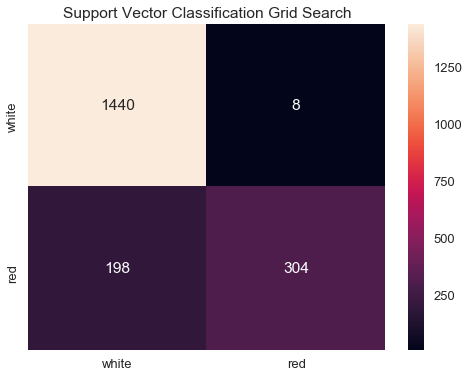

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_predict = GS.predict(X_test)
classes = ['white', 'red']

acc = accuracy_score(y_test, y_predict)
report = classification_report(y_test, y_predict, target_names = classes)
cm = confusion_matrix(y_test, y_predict)

# Note that the dataset has many more examples of white wines than red
print(acc)
print(report)

plt.figure().set_size_inches(8, 6)
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set(title='Support Vector Classification Grid Search',
      xticklabels=classes, yticklabels=classes);